<h3 style='color:blue' align='center'>Customer Attrition Prediction Using Artificial Neural Network (ANN)</h3>

This is a tutorial on predicting customer churn in the telecom business using a deep learning model based on an Artificial Neural Network (ANN). The performance of the model is evaluated using precision, recall, and F1-score metrics.

Imports

In [30]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn
import tensorflow as tf
from tensorflow import keras

Load the data

In [31]:
df = pd.read_csv("attritionData.csv")
df.drop('customerID', axis='columns', inplace=True)

Convert TotalCharges to numeric

In [32]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])

Data visualization

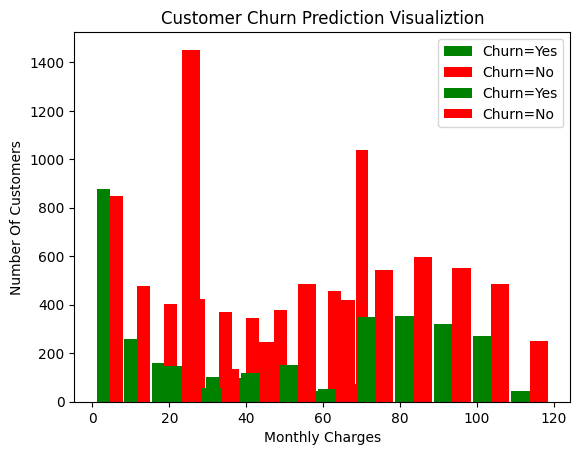

In [33]:
tenure_churn_no = df[df['Churn'] == 'No']['tenure']
tenure_churn_yes = df[df['Churn'] == 'Yes']['tenure']
plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.legend()

mc_churn_no = df[df['Churn'] == 'No']['MonthlyCharges']
mc_churn_yes = df[df['Churn'] == 'Yes']['MonthlyCharges']
plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.legend()

Preprocess the data

In [34]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
for col in yes_no_columns:
    df[col].replace({'Yes': 1, 'No': 0}, inplace=True)
df['gender'].replace({'Female': 1, 'Male': 0}, inplace=True)

df = pd.get_dummies(data=df, columns=['InternetService', 'Contract', 'PaymentMethod'])
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

Train test split

In [35]:
X = df.drop('Churn', axis='columns')
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)


Build a model (ANN) in tensorflow/keras

In [36]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=200)
model.evaluate(X_test, y_test)

Epoch 1/200
176/176 [==============================] - 2s 4ms/step - loss: 0.4776 - accuracy: 0.7700
Epoch 2/200
176/176 [==============================] - 1s 4ms/step - loss: 0.4238 - accuracy: 0.8007
Epoch 3/200
176/176 [==============================] - 0s 3ms/step - loss: 0.4179 - accuracy: 0.8007
Epoch 4/200
176/176 [==============================] - 0s 3ms/step - loss: 0.4151 - accuracy: 0.8059
Epoch 5/200
176/176 [==============================] - 0s 3ms/step - loss: 0.4127 - accuracy: 0.8069
Epoch 6/200
176/176 [==============================] - 1s 3ms/step - loss: 0.4115 - accuracy: 0.8094
Epoch 7/200
176/176 [==============================] - 0s 3ms/step - loss: 0.4091 - accuracy: 0.8112
Epoch 8/200
176/176 [==============================] - 1s 3ms/step - loss: 0.4081 - accuracy: 0.8112
Epoch 9/200
176/176 [==============================] - 1s 3ms/step - loss: 0.4058 - accuracy: 0.8089
Epoch 10/200
176/176 [==============================] - 0s 2ms/step - loss: 0.4039 - accura

[0.5451064705848694, 0.7640369534492493]

Predict churn

In [37]:
y_pred = model.predict(X_test)
y_pred = [1 if pred > 0.5 else 0 for pred in y_pred]


44/44 [==============================] - 0s 1ms/step


Classification report

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       999
           1       0.62      0.48      0.54       408

    accuracy                           0.76      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.75      0.76      0.75      1407



Confusion matrix visualization

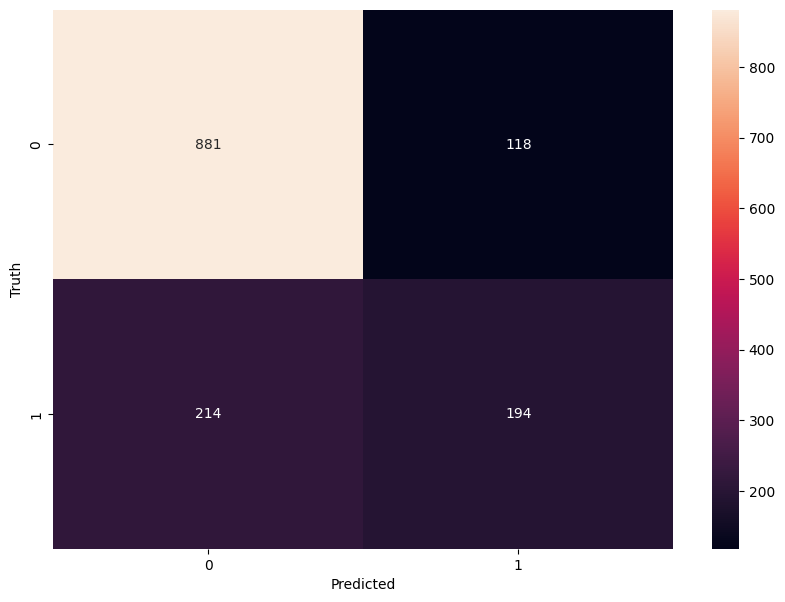

In [39]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
